In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

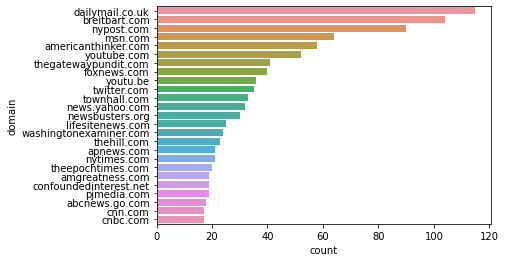

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

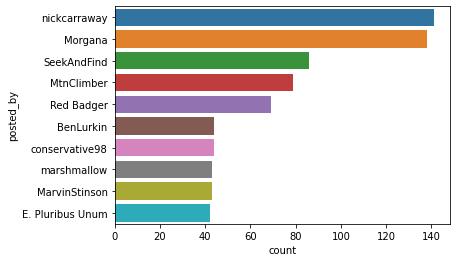

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain                                 \
                                         count unique                     top   
domain                 posted_by                                                
abcnews.go.com         BenLurkin             1      1          abcnews.go.com   
                       Morgana               2      1          abcnews.go.com   
                       nickcarraway          1      1          abcnews.go.com   
americanthinker.com    E. Pluribus Unum      1      1     americanthinker.com   
                       MtnClimber           37      1     americanthinker.com   
                       SeekAndFind          13      1     americanthinker.com   
amgreatness.com        MtnClimber           16      1         amgreatness.com   
apnews.com             marshmallow           1      1              apnews.com   
breitbart.com          Morgana               8      1           breitbart.com   
                       E. Pluribus Unum      3      1           breitbart.com   
                       MarvinStinson        25      1           breitbart.com   
                       Red Badger            1      1           breitbart.com   
                       conservative98       12      1           breitbart.com   
cnbc.com               Morgana               1      1                cnbc.com   
                       Red Badger            2      1                cnbc.com   
cnn.com                BenLurkin             1      1                 cnn.com   
                       Morgana               2      1                 cnn.com   
                       MarvinStinson         1      1                 cnn.com   
                       Red Badger            1      1                 cnn.com   
dailymail.co.uk        Morgana              46      1         dailymail.co.uk   
                       SeekAndFind           2      1         dailymail.co.uk   
                       Red Badger            1      1         dailymail.co.uk   
foxnews.com            BenLurkin             4      1             foxnews.com   
                       Morgana               2      1             foxnews.com   
                       MtnClimber            1      1             foxnews.com   
                       Red Badger            2      1             foxnews.com   
                       conservative98        6      1             foxnews.com   
lifesitenews.com       Morgana               5      1        lifesitenews.com   
                       marshmallow           9      1        lifesitenews.com   
msn.com                nickcarraway          5      1                 msn.com   
                       SeekAndFind           2      1                 msn.com   
news.yahoo.com         Morgana               1      1          news.yahoo.com   
                       nickcarraway          2      1          news.yahoo.com   
                       E. Pluribus Unum      1      1          news.yahoo.com   
newsbusters.org        Morgana              15      1         newsbusters.org   
nypost.com             BenLurkin             2      1              nypost.com   
                       nickcarraway         31      1              nypost.com   
                       conservative98       10      1              nypost.com   
nytimes.com            conservative98        1      1             nytimes.com   
pjmedia.com            E. Pluribus Unum      1      1             pjmedia.com   
                       SeekAndFind          10      1             pjmedia.com   
theepochtimes.com      E. Pluribus Unum      1      1       theepochtimes.com   
                       SeekAndFind           6      1       theepochtimes.com   
thegatewaypundit.com   E. Pluribus Unum      1      1    thegatewaypundit.com   
thehill.com            Morgana               1      1             thehill.com   
                       Red Badger            2      1             thehill.com   
                       conservative98        1      1             thehi

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
Former Japanese PM Abe Shinzo collapses (Shot while giving a campaign speech),2022-07-08 06:41:35,180.0
